In [1]:
import os
import sys

sys.path.append('../')
import neat as neat

import matplotlib.pyplot as plt
from drawnetwork import *
import random

In [2]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

In [3]:
local_dir = './'
config_file = os.path.join(local_dir, 'config-feedforward')

# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_file)

p = neat.Population(config)
stats = neat.StatisticsReporter()
p.add_reporter(stats)

In [4]:
seed = int(10000*random.random())
# seed = 6738
random.seed(seed)
print('seed: ',seed)

seed:  985


Experiment  0
[(0.63, 0.95), (0.78, 0.26), (0.78, 0.85), (0.5, 0.79)]
[(0.5,), (0.24,), (0.31,), (0.29,)]

Best genome:
Key: 231
Fitness: 3.9749052501795035
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.43886475759296295, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=0.42343144897679025, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=0.011127694117694261, enabled=True)

Output:
input (0.63, 0.95), expected output (0.5,), got [0.46307430955807993]
input (0.78, 0.26), expected output (0.24,), got [0.16791664909444048]
input (0.78, 0.85), expected output (0.31,), got [0.4130569976906969]
input (0.5, 0.79), expected output (0.29,), got [0.37896341357597374]



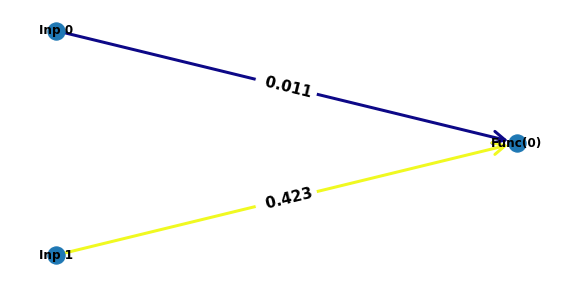

Experiment  1
[(0.11, 0.89), (0.64, 0.39), (0.35, 0.8), (0.47, 0.5)]
[(0.66,), (0.2,), (0.02,), (0.21,)]

Best genome:
Key: 286
Fitness: 3.9297880984473634
Nodes:
	0 DefaultNodeGene(key=0, bias=0.5742792369283746, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-0.40600766339525995, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=-1.6660515952721535, enabled=True)

Output:
input (0.63, 0.95), expected output (0.5,), got [0.013318375220008513]
input (0.78, 0.26), expected output (0.24,), got [0.01545853100773562]
input (0.78, 0.85), expected output (0.31,), got [0.004717547008319431]
input (0.5, 0.79), expected output (0.29,), got [0.05227911496606096]

input (0.11, 0.89), expected output (0.66,), got [0.5370155803535442]
input (0.64, 0.39), expected output (0.2,), got [0.03726642718704202]
input (0.35, 0.8), expected output (0.02,), got [0.15866100787654522]
input (0.47, 0.5), expected output (0.21,), got [0.1131617676

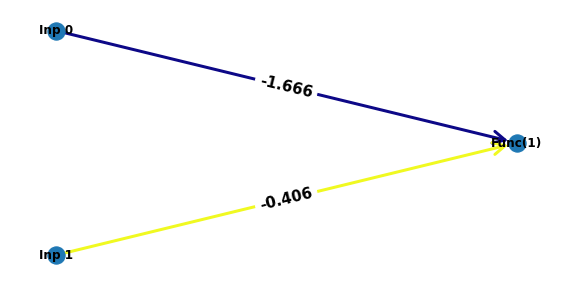

In [5]:
inps = {}
outs = {}
pnet = {}
for exper in range(2):
    print('Experiment ',exper)
    
    pnet[exper] = neat.Population(config)
    stats = neat.StatisticsReporter()
    pnet[exper].add_reporter(stats)
    node_names = {-1: 'Inp 0', -2: 'Inp 1', 0: 'Func({0:d})'.format(exper)}

    # Should all the input/output be scaled to +/- 1?????
    xor_inputs = [(int(100.*random.random())/100.0,int(100.*random.random())/100.0) for _ in range(4)]
    xor_outputs = [(int(100.*random.random())/100.0,) for _ in range(4)]
    
#     xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
#     xor_outputs = [(0.0,), (0.33,), (0.66,), (1.0,)]
#     xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]

    print(xor_inputs)
    print(xor_outputs)

    inps[exper] = xor_inputs
    outs[exper] = xor_outputs

    for cnt in range(500):
        winner = pnet[exper].run(eval_genomes, 1)
        if (winner.fitness >= config.fitness_threshold):
            break
#
    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for idx in inps:
        for xi, xo in zip(inps[idx], outs[idx]):
            output = winner_net.activate(xi)
            print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))
        print()

    show_disabled = True
    draw_network(winner,config,show_disabled,seed,node_names)

In [6]:
# show_disabled = True
# draw_network(winner,config,show_disabled,seed,node_names)

# show_disabled = False
# draw_network(winner,config,show_disabled,seed,node_names)